In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rc
# plt.rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False 

## 항공사

In [128]:
airline_df = pd.read_excel('By_Airline_202211_202410.xlsx')

airline_df

,항공사,운항,Unnamed: 2,Unnamed: 3,여객,Unnamed: 5,Unnamed: 6,화물,Unnamed: 8,Unnamed: 9
0,NaN,도착,출발,합계,도착,출발,합계,도착,출발,합계
1,가루다인도네시아,716,716,1432,143030,139505,282535,2233,5124,7357
2,그레이터베이항공,551,551,1102,63428,70407,133835,532,312,844
3,길상항공,49,49,98,6873,7373,14246,36,3,40
4,내셔널항공,30,44,74,0,0,0,169,3236,3405
...,...,...,...,...,...,...,...,...,...,...
122,NCR,7,7,14,0,0,0,158,299,457
123,QS,1,1,2,72,71,143,0,0,0
124,RON,4,4,8,17,0,17,0,0,0
125,ZP,4,4,8,0,0,0,32,11,42


In [93]:
# 열 이름 변경
airline_df = airline_df[['항공사', '여객', 'Unnamed: 5', 'Unnamed: 6']].rename(columns={
    '항공사': 'airline',
    '여객': 'arriving',
    'Unnamed: 5': 'departure',
    'Unnamed: 6': 'total'
})

# 국내 항공사 리스트
airline_k = ['제주항공','진에어','티웨이항공','에어서울','에어부산','이스타항공', '대한항공', '아시아나항공']

# 국내 항공사만 필터링
airline_filtered = airline_df[airline_df['airline'].isin(airline_k)]

airline_filtered


,airline,arriving,departure,total
5,대한항공,14241139,14129484,28370623
38,아시아나항공,8938562,8964837,17903399
51,에어부산,1498784,1517570,3016354
52,에어서울,1609732,1631157,3240889
68,이스타항공,744330,742694,1487024
72,제주항공,5661288,5658953,11320241
83,진에어,4307354,4290426,8597780
102,티웨이항공,3982928,3986510,7969438


In [94]:
arrived_passengers = airline_filtered['arriving'].sum()

# 2년 -> 1달 -> 1일, 0.3% 승객 수 계산 
print(f'{arrived_passengers/24/30*0.003:.2f}')

170.77


In [95]:
departing_passengers = airline_filtered['departure'].sum()

print(f'{departing_passengers/24/30*0.003:.2f}')

170.51


## 시간

In [96]:
time_df = pd.read_excel('By_Time_202211_202410.xlsx')

time_df = time_df[['구분', '여객', 'Unnamed: 5', 'Unnamed: 6']].rename(columns={
    '구분': 'time',
    '여객': 'arriving',
    'Unnamed: 5': 'departure',
    'Unnamed: 6': 'total'
})

time_df = time_df[1:]
time_df['time'] = time_df['time'].str.replace(r':\d{2} ~ \d{2}:\d{2}', '', regex=True)

time_df

,time,arriving,departure,total
1,00,332736,881412,1214148
2,01,124207,692446,816653
3,02,53064,398935,451999
4,03,582345,65526,647871
5,04,2409956,13048,2423004
6,05,3363456,21918,3385374
7,06,4054023,536878,4590901
8,07,3364539,2023797,5388336
9,08,2476738,4378423,6855161
10,09,2233565,4793721,7027286


In [97]:
time_df['arriving_ratio'] = [r['arriving']/60611037*100 if i != 0 else None for i, r in time_df.iterrows()]
time_df['departure_ratio'] = [r['departure']/60427603*100 if i != 0 else None for i, r in time_df.iterrows()]
time_df = time_df[:-1]

time_df

,time,arriving,departure,total,arriving_ratio,departure_ratio
1,00,332736,881412,1214148,0.548969,1.458625
2,01,124207,692446,816653,0.204925,1.145910
3,02,53064,398935,451999,0.087548,0.660187
4,03,582345,65526,647871,0.960790,0.108437
5,04,2409956,13048,2423004,3.976101,0.021593
6,05,3363456,21918,3385374,5.549247,0.036272
7,06,4054023,536878,4590901,6.688589,0.888465
8,07,3364539,2023797,5388336,5.551034,3.349127
9,08,2476738,4378423,6855161,4.086282,7.245733
10,09,2233565,4793721,7027286,3.685080,7.932999


In [98]:
arrived_passengers_max_time = time_df.loc[time_df['arriving_ratio'].idxmax(), 'time']
arrived_passengers_max_ratio = time_df.loc[time_df['arriving_ratio'].idxmax(), 'arriving_ratio']
print(arrived_passengers_max_time, arrived_passengers_max_ratio)

17 8.697726125358985


In [99]:
departing_passengers_max_time = time_df.loc[time_df['departure_ratio'].idxmax(), 'time']
departing_passengers_max_ratio = time_df.loc[time_df['departure_ratio'].idxmax(), 'departure_ratio']
print(departing_passengers_max_time, departing_passengers_max_ratio)

10 8.70109807268046


Text(0.5, 1.0, 'arrived passengers')

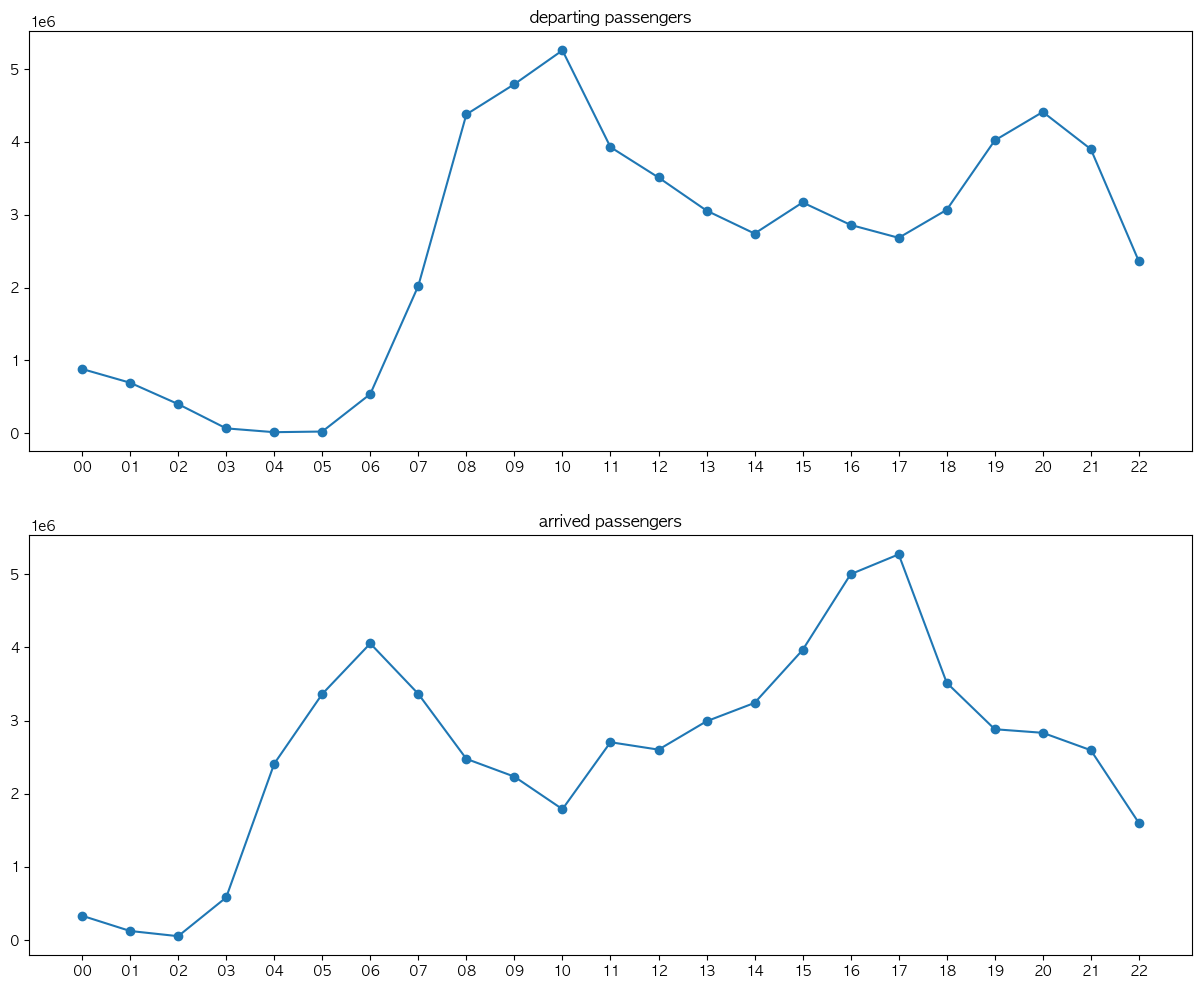

In [100]:
time_df = time_df[:-1]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,12))
ax1.plot(time_df['time'], time_df['departure'], marker= 'o')
ax1.set_title('departing passengers')
ax2.plot(time_df['time'], time_df['arriving'], marker='o')
ax2.set_title('arrived passengers')

### (1) 출국하는 경우

- 9-11시에 가장 붐빔
- 전체 시간대의 약 (7.93+8.70)% 정도 이 시간대에 출국함
- 하루 170명

In [101]:
170*(0.087+0.0793)

28.271

## 지역

In [122]:
loc_df = pd.read_excel('등록인구.xlsx')

loc_df.columns

Index(['동별(1)', '동별(2)', '2024 3/4', '2024 3/4.1', '2024 3/4.2', '2024 3/4.3',
       '2024 3/4.4', '2024 3/4.5', '2024 3/4.6', '2024 3/4.7', '2024 3/4.8',
       '2024 3/4.9', '2024 3/4.10', '2024 3/4.11'],
      dtype='object')

In [123]:
loc_df = loc_df[['동별(2)','2024 3/4.1']].rename(columns={
    '동별(2)' : 'location',
    '2024 3/4.1' : 'population'
})

loc_df = loc_df[2:]

loc_df['ratio'] = [r['population']/9605419 * 100 if i != 0 else None for i, r in loc_df.iterrows()]

loc_df

,location,population,ratio
2,소계,9605419,100.000000
3,종로구,150011,1.561733
4,중구,131589,1.369945
5,용산구,218370,2.273404
6,성동구,282385,2.939851
7,광진구,349307,3.636562
8,동대문구,359219,3.739754
9,중랑구,386131,4.019929
10,성북구,435492,4.533816
11,강북구,289678,3.015777


In [126]:
loc_df['passengers'] = [r['ratio']*28.3/100 if i != 0 else None for i, r in loc_df.iterrows()]

loc_df

,location,population,ratio,passengers
2,소계,9605419,100.000000,28.300000
3,종로구,150011,1.561733,0.441970
4,중구,131589,1.369945,0.387695
5,용산구,218370,2.273404,0.643373
6,성동구,282385,2.939851,0.831978
7,광진구,349307,3.636562,1.029147
8,동대문구,359219,3.739754,1.058350
9,중랑구,386131,4.019929,1.137640
10,성북구,435492,4.533816,1.283070
11,강북구,289678,3.015777,0.853465
